# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('../Ventas.csv',sep=";")

In [3]:
data.head(5)

,Ventas,Radio,TV,Diarios
0,551,80,35,70
1,547,58,35,88
2,382,63,21,58
3,453,73,36,64
4,387,64,16,69


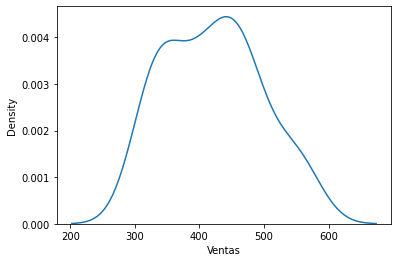

In [3]:
sns.kdeplot(data.Ventas)
plt.show()

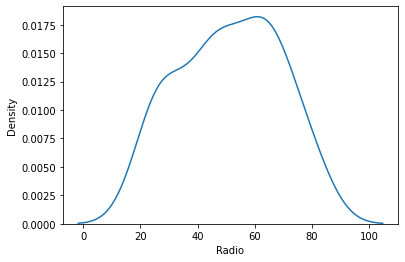

In [5]:
sns.kdeplot(data.Radio)
plt.show()

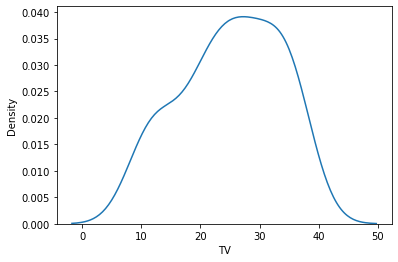

In [6]:
sns.kdeplot(data.TV)
plt.show()

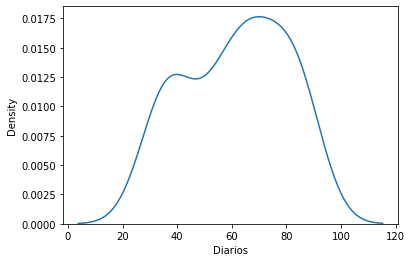

In [7]:
sns.kdeplot(data.Diarios)
plt.show()

In [8]:
#Normality test
ss.shapiro(data['Ventas'])

ShapiroResult(statistic=0.9536961317062378, pvalue=0.08139657974243164)

In [9]:
#Normality test
ss.shapiro(data['Radio'])

ShapiroResult(statistic=0.9463553428649902, pvalue=0.04393230006098747)

In [10]:
#Normality test
ss.shapiro(data['TV'])

ShapiroResult(statistic=0.9397193193435669, pvalue=0.025393284857273102)

In [11]:
#Normality test
ss.shapiro(data['Diarios'])

ShapiroResult(statistic=0.9332762360572815, pvalue=0.01508260052651167)

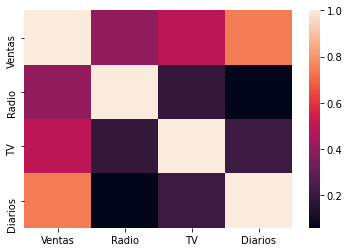

In [4]:
#Heatmap
sns.heatmap(data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman"))
plt.show()

In [ ]:
#linearity

#Multicollinearity 

In [13]:
# Correlation Test
#Ho: there is no correlation between the variables
#Ha: there is a correlation between the variables 

In [14]:
data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman")

,Ventas,Radio,TV,Diarios
Ventas,1.000000,0.404255,0.499225,0.741982
Radio,0.404255,1.000000,0.186254,0.059299
TV,0.499225,0.186254,1.000000,0.208621
Diarios,0.741982,0.059299,0.208621,1.000000


In [15]:
ss.spearmanr(data['Ventas'],data['Radio'])

SpearmanrResult(correlation=0.4042545567808915, pvalue=0.007175504487928522)

In [17]:
ss.spearmanr(data['Ventas'],data['TV'])

SpearmanrResult(correlation=0.49922517771463226, pvalue=0.0006546986013042753)

In [18]:
ss.spearmanr(data['Ventas'],data['Diarios'])

SpearmanrResult(correlation=0.7419818173372642, pvalue=1.244025397405954e-08)

In [19]:
ss.spearmanr(data['Radio'],data['TV'])

SpearmanrResult(correlation=0.1862535043498252, pvalue=0.23175322515474867)

In [20]:
ss.spearmanr(data['Radio'],data['Diarios'])

SpearmanrResult(correlation=0.0592992943049514, pvalue=0.7056342575130212)

In [21]:
ss.spearmanr(data['TV'],data['Diarios'])

SpearmanrResult(correlation=0.20862051388195071, pvalue=0.17942380987207668)

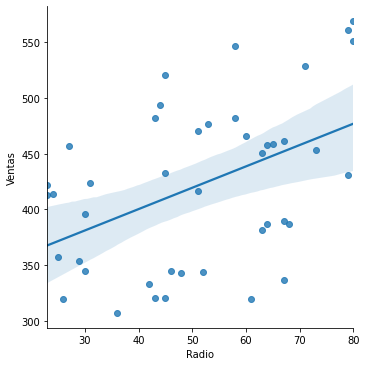

In [16]:
sns.lmplot(x='Radio',y='Ventas',data=data)
plt.show()

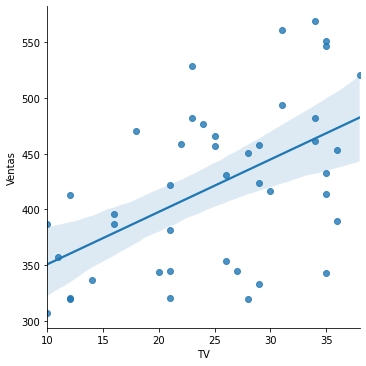

In [17]:
sns.lmplot(x='TV',y='Ventas',data=data)
plt.show()

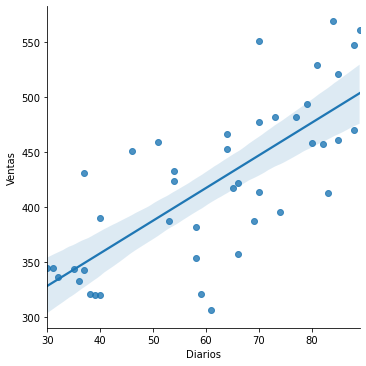

In [24]:
sns.lmplot(x='Diarios',y='Ventas',data=data)
plt.show()

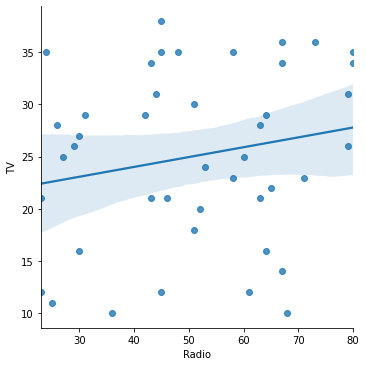

In [25]:
sns.lmplot(x='Radio',y='TV',data=data)
plt.show()

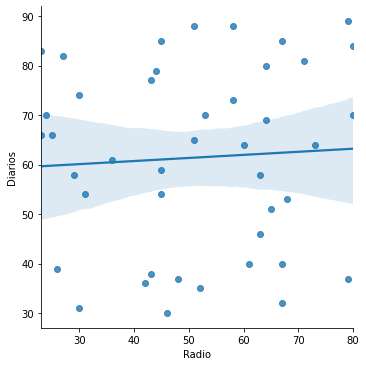

In [26]:
sns.lmplot(x='Radio',y='Diarios',data=data)
plt.show()

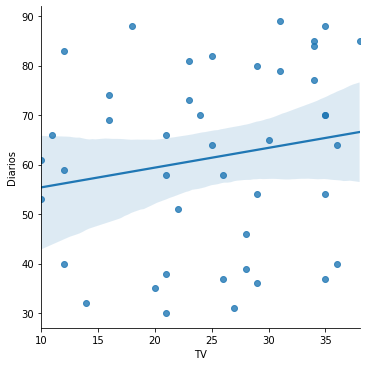

In [27]:
sns.lmplot(x='TV',y='Diarios',data=data)
plt.show()

In [18]:
#Linear regression 
modelo = smf.ols('Ventas ~ Radio + TV + Diarios', data=data).fit()

In [19]:
print(modelo.summary())
# 1 coefficient of determination
# R-squared: 0.829 => The most suitable model will be the one with a close R-squared 1
# Adj. R-squared: 0.816 => The most suitable model will be the one with a R-squared close to 1

# 2 ANOVA test
#Ho: b0 = b1 = b2 = b3 = 0
#Ha: at least one bi! = 0

#Prob (F-statistic): 5.09e-15 => As the pvalue <5%, at 95% confidence the model is significant

# 3 t test for coefficients
#Ho: bi = 0
#Ha: bi! = 0

# 4 model assumptions

# a.Linearity => Sales vs Radio, Sales vs TV, Sales vs Newspapers => ok

# b.Error independence => DW: 1.716, as this value is between 1.5 and 2.5 the assumption is fulfilled => ok

# c.Homoscedasticity => the error is constant along the values of the dependent variable

# d.Error normality => Prob (JB): 0.362, at 95%, the errors are close to a normal distribution => ok

# e. Multicollinearity => Radio vs TV, Radio vs Newspapers, TV vs Newspapers => ok 

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     63.06
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           5.09e-15
Time:                        17:48:43   Log-Likelihood:                -207.61
No. Observations:                  43   AIC:                             423.2
Df Residuals:                      39   BIC:                             430.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.5435     23.643      4.591      0.0

In [20]:
modelo.params
#Ventas = 108.543492 + 1.464563Radio + 3.035945TV + 2.639268Diarios

Intercept    108.543492
Radio          1.464563
TV             3.035945
Diarios        2.639268
dtype: float64

In [21]:
modelo.mse_resid

#A menor valor, el modelo es más adecuado

1008.1736046816459